In [1]:
from samana.forward_model import forward_model_single_iteration
import numpy as np
import matplotlib.pyplot as plt
from samana.Data.Mocks.baseline_smooth_mock import BaselineSmoothMockMultipole1, BaselineSmoothMockMultipole2, BaselineSmoothMockMultipole3, BaselineSmoothMockMultipole4, BaselineSmoothMockModel
from samana.output_storage import Output
import os
import pickle
from trikde.triangleplot import TrianglePlot
from trikde.pdfs import IndependentLikelihoods, DensitySamples
from samana.inference_util import compute_macromodel_likelihood

/Users/danielgilman/Code/samana/samana/output_storage.py:211: RuntimeWarning: divide by zero encountered in divide
  self._flux_ratios = self.image_magnifications[:, 1:] / self.image_magnifications[:, 0, np.newaxis]
/Users/danielgilman/Code/samana/samana/output_storage.py:211: RuntimeWarning: invalid value encountered in divide
  self._flux_ratios = self.image_magnifications[:, 1:] / self.image_magnifications[:, 0, np.newaxis]


effective sample size:  144.7494599599667
number of good fits (reduced chi^2 < 1):  173
effective sample size:  144.7494599599667
number of good fits (reduced chi^2 < 1):  173


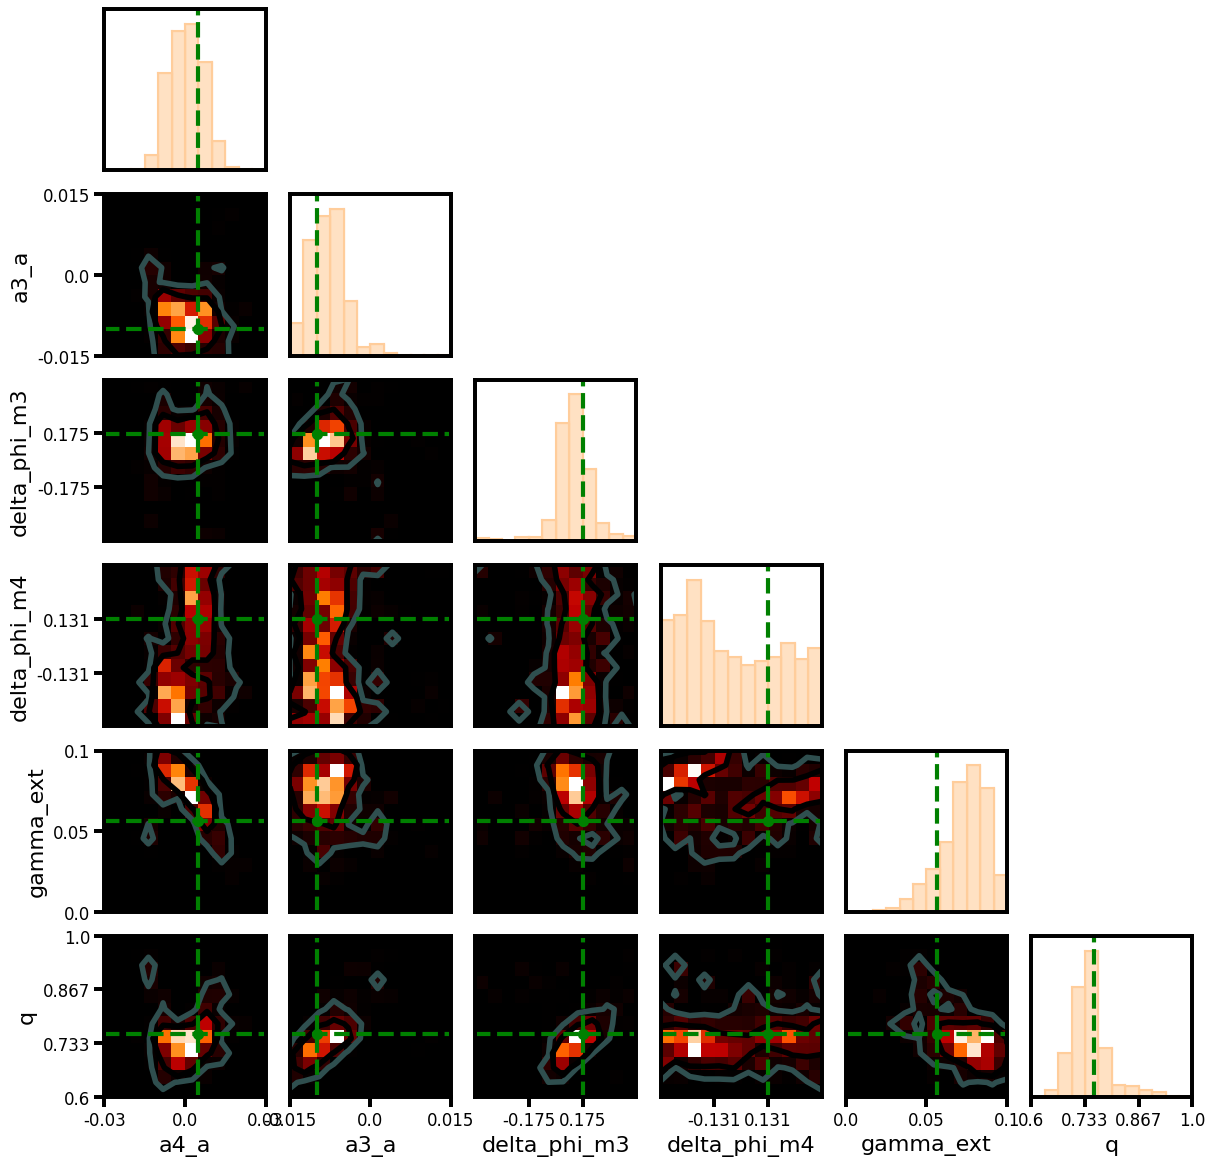

In [2]:
sim_name = 'multipole_test_mock_1_output'

if sim_name == 'multipole_test_mock_1_output':
    data_class = BaselineSmoothMockMultipole1()
elif sim_name == 'multipole_test_mock_2_output':
    data_class = BaselineSmoothMockMultipole2()
elif sim_name == 'multipole_test_mock_3_output':
    data_class = BaselineSmoothMockMultipole3()
elif sim_name == 'multipole_test_mock_4_output':
    data_class = BaselineSmoothMockMultipole4()
else:
    raise Exception('sim name not valid')
    
flux_ratios_data = data_class.magnifications[1:]/data_class.magnifications[0]
output_path = os.getenv('HOME') + '/Code/samana/notebooks/'+sim_name
with open(output_path, 'rb') as f:
    output = pickle.load(f).clean_nans()
f.close()

measurement_uncertainties = 0.03 * flux_ratios_data
param_names_macro = ['a4_a', 'a3_a', 
                     'delta_phi_m3', 'delta_phi_m4', 'gamma_ext', 'q']
phi_true = data_class.phi_q_true
phi3_true = data_class.delta_phi_m3_true+phi_true
phi4_true = data_class.delta_phi_m4_true+phi_true
param_ranges = [[-0.03, 0.03], [-0.015,0.015], [-np.pi/6, np.pi/6], [-np.pi/8, np.pi/8], [0.0, 0.1], [0.6, 1.0]]

_, fr_likelihood, _, _ = compute_macromodel_likelihood(output,
                                  100,
                                  flux_ratios_data,
                                  measurement_uncertainties,
                                  param_names_macro,
                                  use_kde=False,
                                  nbins=12,
                                  n_keep=None,
                                  n_bootstraps=0,
                                  param_ranges_macro=param_ranges)

phi_true = data_class.phi_q_true
truths = {'a3_a': data_class.a3a_true, 
          'a4_a': data_class.a4a_true, 
          'delta_phi_m3': data_class.delta_phi_m3_true,
          'delta_phi_m4': data_class.delta_phi_m4_true,
          'a3': data_class.a3a_true * np.cos(phi_true + data_class.delta_phi_m3_true), 
          'b3': data_class.a3a_true * np.sin(phi_true + data_class.delta_phi_m3_true),
          'a4': data_class.a4a_true * np.cos(phi_true + data_class.delta_phi_m4_true),
          'b4': data_class.a4a_true * np.sin(phi_true + data_class.delta_phi_m4_true),
         'gamma': 2.05,
         'q': data_class.q_true, 
         'phi_m3': data_class.delta_phi_m3_true+data_class.phi_q_true, 
         'phi_m4': data_class.delta_phi_m4_true+data_class.phi_q_true, 
          'phi_q': data_class.phi_q_true, 
          'gamma_ext': np.sqrt(2) * 0.04
         }
triplot = TrianglePlot([fr_likelihood])
axes = triplot.make_triplot(filled_contours=False, truths=truths, show_intervals=False)

effective sample size:  444.8810541491864
number of good fits (reduced chi^2 < 1):  528
effective sample size:  444.8810541491864
number of good fits (reduced chi^2 < 1):  528


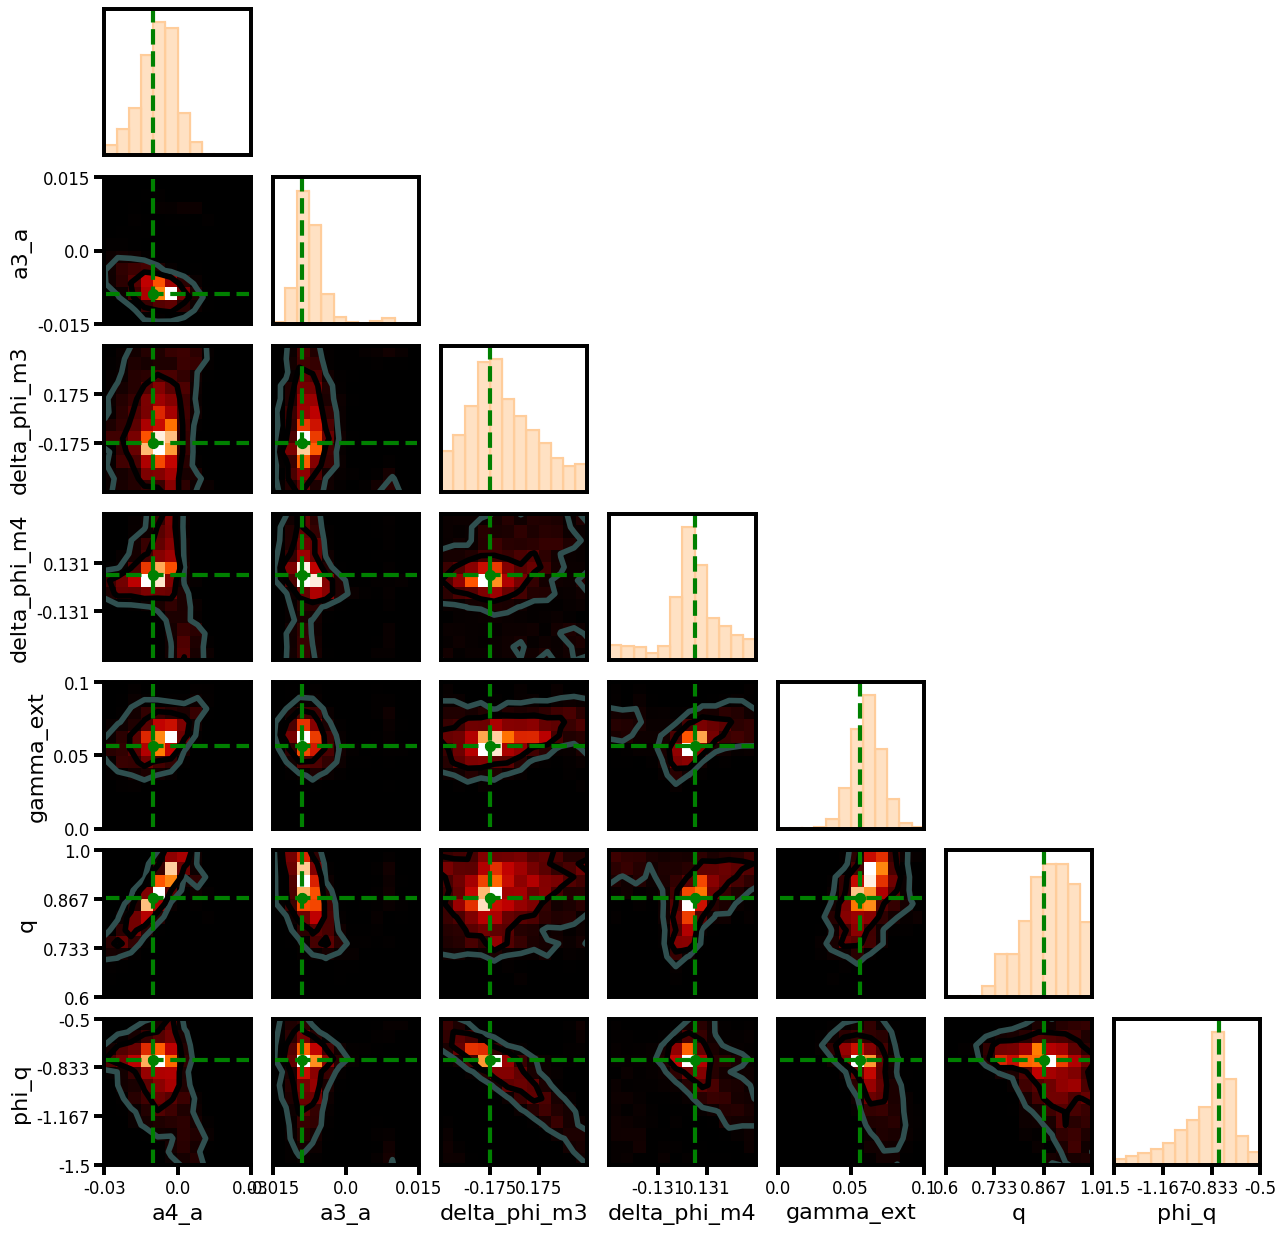

In [3]:
sim_name = 'multipole_test_mock_2_output'

if sim_name == 'multipole_test_mock_1_output':
    data_class = BaselineSmoothMockMultipole1()
elif sim_name == 'multipole_test_mock_2_output':
    data_class = BaselineSmoothMockMultipole2()
elif sim_name == 'multipole_test_mock_3_output':
    data_class = BaselineSmoothMockMultipole3()
elif sim_name == 'multipole_test_mock_4_output':
    data_class = BaselineSmoothMockMultipole4()
else:
    raise Exception('sim name not valid')
    
flux_ratios_data = data_class.magnifications[1:]/data_class.magnifications[0]
output_path = os.getenv('HOME') + '/Code/samana/notebooks/'+sim_name
with open(output_path, 'rb') as f:
    output = pickle.load(f).clean_nans()
f.close()

measurement_uncertainties = 0.03 * flux_ratios_data
param_names_macro = ['a4_a', 'a3_a', 
                     'delta_phi_m3', 'delta_phi_m4', 'gamma_ext', 'q', 'phi_q']
phi_true = data_class.phi_q_true
phi3_true = data_class.delta_phi_m3_true+phi_true
phi4_true = data_class.delta_phi_m4_true+phi_true
param_ranges = [[-0.03, 0.03], [-0.015,0.015], [-np.pi/6, np.pi/6], [-np.pi/8, np.pi/8], [0.0, 0.1], [0.6, 1.0], [-1.5, -0.5]]

_, fr_likelihood, _, _ = compute_macromodel_likelihood(output,
                                  100,
                                  flux_ratios_data,
                                  measurement_uncertainties,
                                  param_names_macro,
                                  use_kde=False,
                                  nbins=12,
                                  n_keep=None,
                                  n_bootstraps=0,
                                  param_ranges_macro=param_ranges)

phi_true = data_class.phi_q_true
truths = {'a3_a': data_class.a3a_true, 
          'a4_a': data_class.a4a_true, 
          'delta_phi_m3': data_class.delta_phi_m3_true,
          'delta_phi_m4': data_class.delta_phi_m4_true,
          'a3': data_class.a3a_true * np.cos(phi_true + data_class.delta_phi_m3_true), 
          'b3': data_class.a3a_true * np.sin(phi_true + data_class.delta_phi_m3_true),
          'a4': data_class.a4a_true * np.cos(phi_true + data_class.delta_phi_m4_true),
          'b4': data_class.a4a_true * np.sin(phi_true + data_class.delta_phi_m4_true),
         'gamma': 2.05,
         'q': data_class.q_true, 
         'phi_m3': data_class.delta_phi_m3_true+data_class.phi_q_true, 
         'phi_m4': data_class.delta_phi_m4_true+data_class.phi_q_true, 
          'phi_q': data_class.phi_q_true, 
          'gamma_ext': np.sqrt(2) * 0.04
         }
triplot = TrianglePlot([fr_likelihood])
axes = triplot.make_triplot(filled_contours=False, truths=truths, show_intervals=False)

effective sample size:  5028.188588966943
number of good fits (reduced chi^2 < 1):  7184
effective sample size:  5028.188588966943
number of good fits (reduced chi^2 < 1):  7184


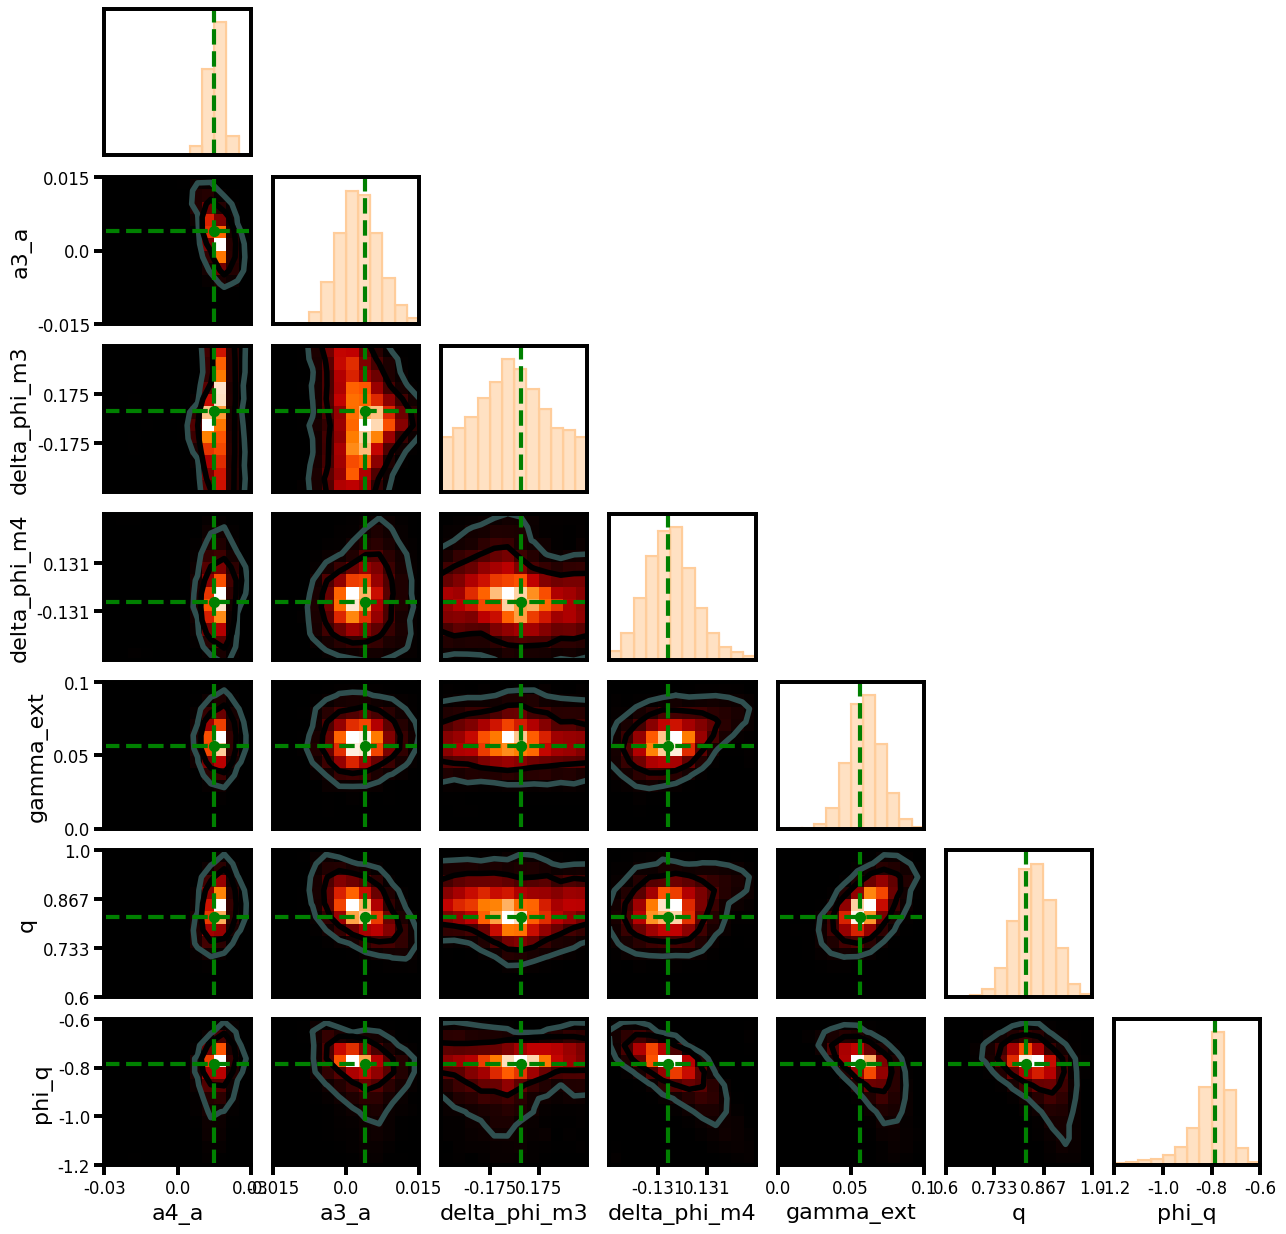

In [4]:
sim_name = 'multipole_test_mock_3_output'

if sim_name == 'multipole_test_mock_1_output':
    data_class = BaselineSmoothMockMultipole1()
elif sim_name == 'multipole_test_mock_2_output':
    data_class = BaselineSmoothMockMultipole2()
elif sim_name == 'multipole_test_mock_3_output':
    data_class = BaselineSmoothMockMultipole3()
elif sim_name == 'multipole_test_mock_4_output':
    data_class = BaselineSmoothMockMultipole4()
else:
    raise Exception('sim name not valid')
    
flux_ratios_data = data_class.magnifications[1:]/data_class.magnifications[0]
output_path = os.getenv('HOME') + '/Code/samana/notebooks/'+sim_name
with open(output_path, 'rb') as f:
    output = pickle.load(f).clean_nans()
f.close()

measurement_uncertainties = 0.03 * flux_ratios_data
param_names_macro = ['a4_a', 'a3_a', 
                     'delta_phi_m3', 'delta_phi_m4', 'gamma_ext', 'q', 'phi_q']
phi_true = data_class.phi_q_true
phi3_true = data_class.delta_phi_m3_true+phi_true
phi4_true = data_class.delta_phi_m4_true+phi_true
param_ranges = [[-0.03, 0.03], [-0.015,0.015], [-np.pi/6, np.pi/6], [-np.pi/8, np.pi/8], [0.0, 0.1], [0.6, 1.0], [-1.2, -0.6]]

_, fr_likelihood, _, _ = compute_macromodel_likelihood(output,
                                  100,
                                  flux_ratios_data,
                                  measurement_uncertainties,
                                  param_names_macro,
                                  use_kde=False,
                                  nbins=12,
                                  n_keep=None,
                                  n_bootstraps=0,
                                  param_ranges_macro=param_ranges)

phi_true = data_class.phi_q_true
truths = {'a3_a': data_class.a3a_true, 
          'a4_a': data_class.a4a_true, 
          'delta_phi_m3': data_class.delta_phi_m3_true,
          'delta_phi_m4': data_class.delta_phi_m4_true,
          'a3': data_class.a3a_true * np.cos(phi_true + data_class.delta_phi_m3_true), 
          'b3': data_class.a3a_true * np.sin(phi_true + data_class.delta_phi_m3_true),
          'a4': data_class.a4a_true * np.cos(phi_true + data_class.delta_phi_m4_true),
          'b4': data_class.a4a_true * np.sin(phi_true + data_class.delta_phi_m4_true),
         'gamma': 2.05,
         'q': data_class.q_true, 
         'phi_m3': data_class.delta_phi_m3_true+data_class.phi_q_true, 
         'phi_m4': data_class.delta_phi_m4_true+data_class.phi_q_true, 
          'phi_q': data_class.phi_q_true, 
          'gamma_ext': np.sqrt(2) * 0.04
         }
triplot = TrianglePlot([fr_likelihood])
axes = triplot.make_triplot(filled_contours=False, truths=truths, show_intervals=False)

effective sample size:  918.2192051836988
number of good fits (reduced chi^2 < 1):  1175
effective sample size:  918.2192051836988
number of good fits (reduced chi^2 < 1):  1175


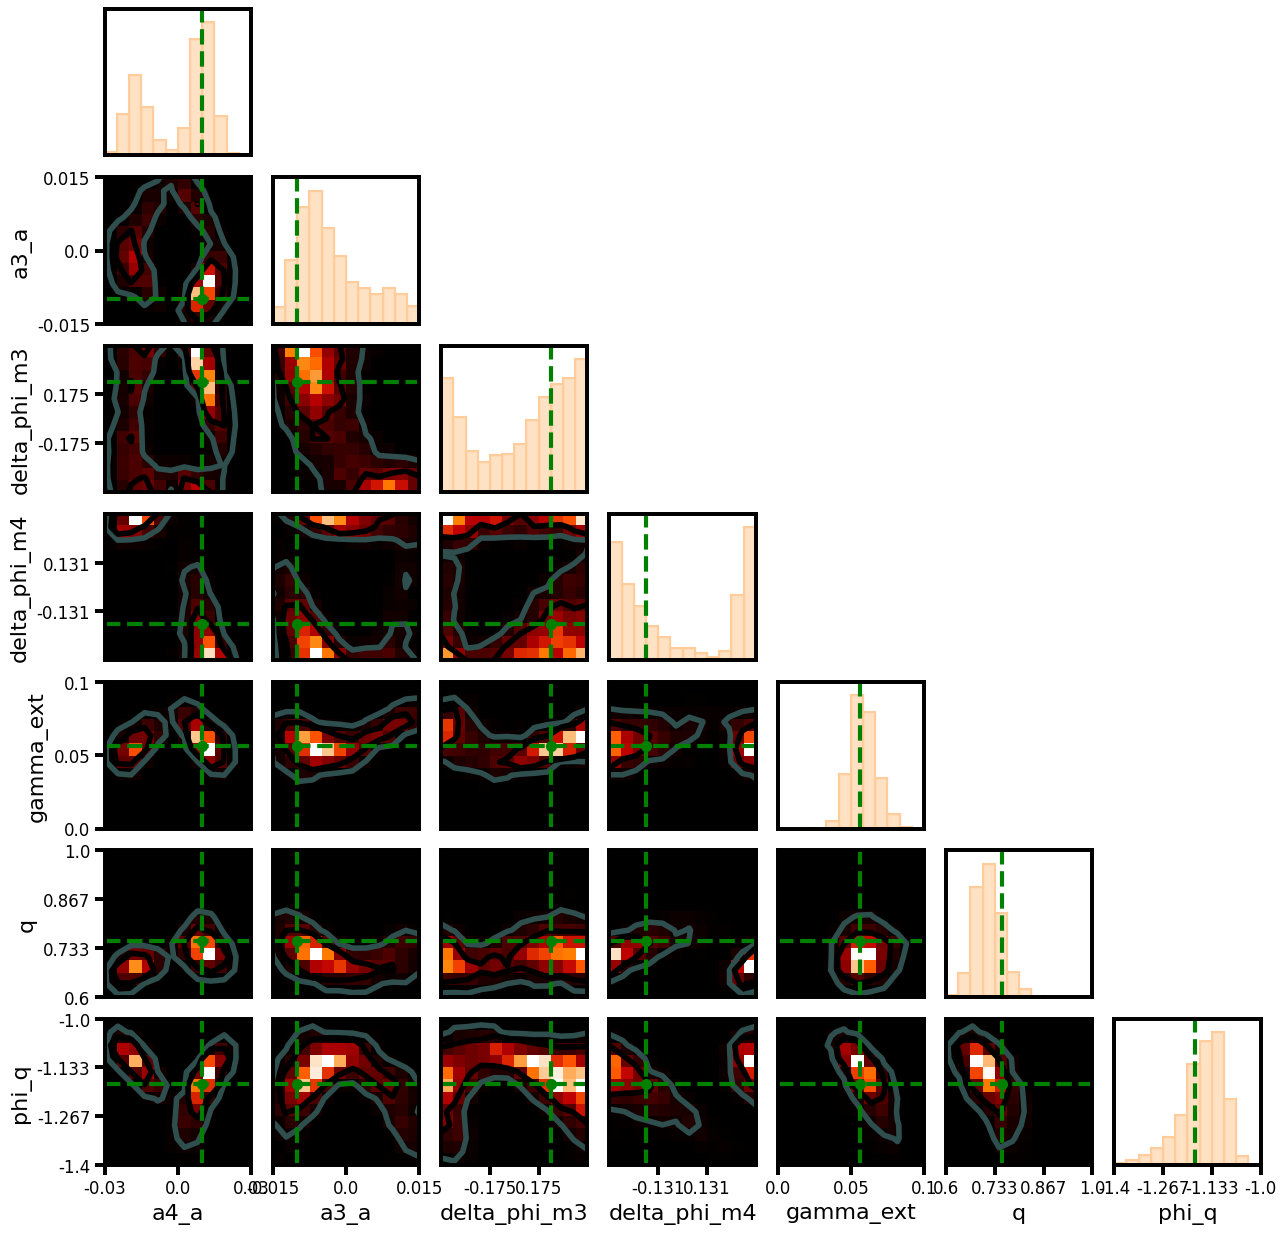

In [5]:
sim_name = 'multipole_test_mock_4_output'

if sim_name == 'multipole_test_mock_1_output':
    data_class = BaselineSmoothMockMultipole1()
elif sim_name == 'multipole_test_mock_2_output':
    data_class = BaselineSmoothMockMultipole2()
elif sim_name == 'multipole_test_mock_3_output':
    data_class = BaselineSmoothMockMultipole3()
elif sim_name == 'multipole_test_mock_4_output':
    data_class = BaselineSmoothMockMultipole4()
else:
    raise Exception('sim name not valid')
    
flux_ratios_data = data_class.magnifications[1:]/data_class.magnifications[0]
output_path = os.getenv('HOME') + '/Code/samana/notebooks/'+sim_name
with open(output_path, 'rb') as f:
    output = pickle.load(f).clean_nans()
f.close()

measurement_uncertainties = 0.03 * flux_ratios_data
param_names_macro = ['a4_a', 'a3_a', 
                     'delta_phi_m3', 'delta_phi_m4', 'gamma_ext', 'q', 'phi_q']
phi_true = data_class.phi_q_true
phi3_true = data_class.delta_phi_m3_true+phi_true
phi4_true = data_class.delta_phi_m4_true+phi_true
param_ranges = [[-0.03, 0.03], [-0.015,0.015], [-np.pi/6, np.pi/6], [-np.pi/8, np.pi/8], [0.0, 0.1], [0.6, 1.0], [-1.4, -1.0]]

_, fr_likelihood, _, _ = compute_macromodel_likelihood(output,
                                  100,
                                  flux_ratios_data,
                                  measurement_uncertainties,
                                  param_names_macro,
                                  use_kde=False,
                                  nbins=12,
                                  n_keep=None,
                                  n_bootstraps=0,
                                  param_ranges_macro=param_ranges)

phi_true = data_class.phi_q_true
truths = {'a3_a': data_class.a3a_true, 
          'a4_a': data_class.a4a_true, 
          'delta_phi_m3': data_class.delta_phi_m3_true,
          'delta_phi_m4': data_class.delta_phi_m4_true,
          'a3': data_class.a3a_true * np.cos(phi_true + data_class.delta_phi_m3_true), 
          'b3': data_class.a3a_true * np.sin(phi_true + data_class.delta_phi_m3_true),
          'a4': data_class.a4a_true * np.cos(phi_true + data_class.delta_phi_m4_true),
          'b4': data_class.a4a_true * np.sin(phi_true + data_class.delta_phi_m4_true),
         'gamma': 2.05,
         'q': data_class.q_true, 
         'phi_m3': data_class.delta_phi_m3_true+data_class.phi_q_true, 
         'phi_m4': data_class.delta_phi_m4_true+data_class.phi_q_true, 
          'phi_q': data_class.phi_q_true, 
          'gamma_ext': np.sqrt(2) * 0.04
         }
triplot = TrianglePlot([fr_likelihood])
axes = triplot.make_triplot(filled_contours=False, truths=truths, show_intervals=False)

effective sample size:  240.46712400927197
number of good fits (reduced chi^2 < 1):  301
effective sample size:  240.46712400927197
number of good fits (reduced chi^2 < 1):  301


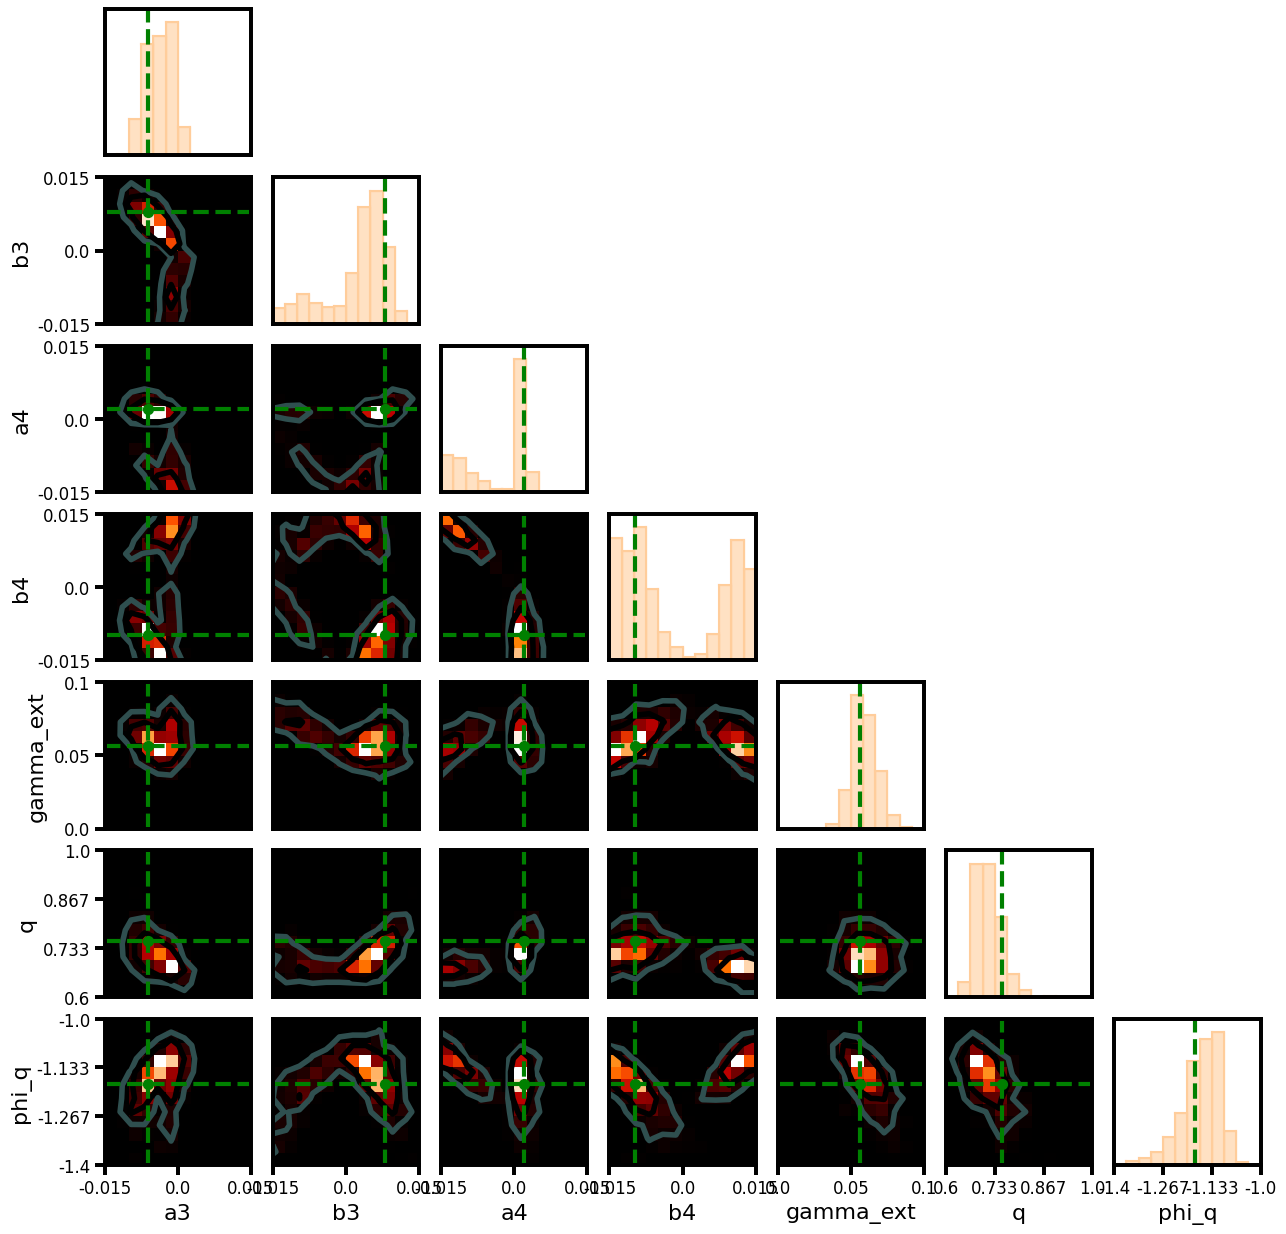

In [6]:
sim_name = 'multipole_test_mock_4_output'

if sim_name == 'multipole_test_mock_1_output':
    data_class = BaselineSmoothMockMultipole1()
elif sim_name == 'multipole_test_mock_2_output':
    data_class = BaselineSmoothMockMultipole2()
elif sim_name == 'multipole_test_mock_3_output':
    data_class = BaselineSmoothMockMultipole3()
elif sim_name == 'multipole_test_mock_4_output':
    data_class = BaselineSmoothMockMultipole4()
else:
    raise Exception('sim name not valid')
    
flux_ratios_data = data_class.magnifications[1:]/data_class.magnifications[0]
output_path = os.getenv('HOME') + '/Code/samana/notebooks/'+sim_name
with open(output_path, 'rb') as f:
    output = pickle.load(f).clean_nans()
f.close()

measurement_uncertainties = 0.02 * flux_ratios_data
param_names_macro = ['a3', 'b3', 
                     'a4', 'b4', 'gamma_ext', 'q', 'phi_q']
phi_true = data_class.phi_q_true
phi3_true = data_class.delta_phi_m3_true+phi_true
phi4_true = data_class.delta_phi_m4_true+phi_true
param_ranges = [[-0.015, 0.015], [-0.015,0.015], [-0.015, 0.015], [-0.015,0.015], [0.0, 0.1], [0.6, 1.0], [-1.4, -1.0]]

_, fr_likelihood, _, _ = compute_macromodel_likelihood(output,
                                  100,
                                  flux_ratios_data,
                                  measurement_uncertainties,
                                  param_names_macro,
                                  use_kde=False,
                                  nbins=12,
                                  n_keep=None,
                                  n_bootstraps=0,
                                  param_ranges_macro=param_ranges)

phi_true = data_class.phi_q_true
truths = {'a3_a': data_class.a3a_true, 
          'a4_a': data_class.a4a_true, 
          'delta_phi_m3': data_class.delta_phi_m3_true,
          'delta_phi_m4': data_class.delta_phi_m4_true,
          'a3': data_class.a3a_true * np.cos(phi_true + data_class.delta_phi_m3_true), 
          'b3': data_class.a3a_true * np.sin(phi_true + data_class.delta_phi_m3_true),
          'a4': data_class.a4a_true * np.cos(phi_true + data_class.delta_phi_m4_true),
          'b4': data_class.a4a_true * np.sin(phi_true + data_class.delta_phi_m4_true),
         'gamma': 2.05,
         'q': data_class.q_true, 
         'phi_m3': data_class.delta_phi_m3_true+data_class.phi_q_true, 
         'phi_m4': data_class.delta_phi_m4_true+data_class.phi_q_true, 
          'phi_q': data_class.phi_q_true, 
          'gamma_ext': np.sqrt(2) * 0.04
         }
triplot = TrianglePlot([fr_likelihood])
axes = triplot.make_triplot(filled_contours=False, truths=truths, show_intervals=False)